In [9]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import Model
import tensorflow as tf
import numpy as np
# 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# 평균과 표준편차는 채널별로 구해줍니다.
x_mean = np.mean(x_train, axis = (0, 1, 2))
x_std = np.std(x_train, axis = (0, 1, 2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3, random_state = 777)

print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

(35000, 32, 32, 3) 35000
(15000, 32, 32, 3) 15000


In [23]:
from tensorflow.keras.applications import VGG16

transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
transfer_model.trainable=False
model_tr = tf.keras.Sequential([
    transfer_model, 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(10, 'softmax')
])

model_tr.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

In [26]:
history = model_tr.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 10s 9ms/step - loss: 0.8496 - acc: 0.7031 - val_loss: 1.0218 - val_acc: 0.6447
Epoch 2/30
1094/1094 [==============================] - 9s 8ms/step - loss: 0.8237 - acc: 0.7123 - val_loss: 1.0179 - val_acc: 0.6483
Epoch 3/30
1094/1094 [==============================] - 9s 8ms/step - loss: 0.8017 - acc: 0.7187 - val_loss: 1.0213 - val_acc: 0.6491
Epoch 4/30
1094/1094 [==============================] - 9s 8ms/step - loss: 0.7792 - acc: 0.7258 - val_loss: 1.0254 - val_acc: 0.6456
Epoch 5/30
1094/1094 [==============================] - 9s 8ms/step - loss: 0.7574 - acc: 0.7345 - val_loss: 1.0402 - val_acc: 0.6483
Epoch 6/30
1094/1094 [==============================] - 9s 8ms/step - loss: 0.7378 - acc: 0.7410 - val_loss: 1.0663 - val_acc: 0.6437
Epoch 7/30
1094/1094 [==============================] - 9s 8ms/step - loss: 0.7191 - acc: 0.7480 - val_loss: 1.0601 - val_acc: 0.6494
Epoch 8/30
1094/1094 [==============================] - 9s 8m

In [27]:
model_tr.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 14,748,170
Trainable params: 33,482
Non-trainable params: 14,714,688
_________________________________________________________________


In [29]:
import tensorflow as tf

get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]
get_output

[<KerasTensor: shape=(None, 32, 32, 3) dtype=float32 (created by layer 'input_8')>,
 <KerasTensor: shape=(None, 32, 32, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, 32, 32, 64) dtype=float32 (created by layer 'block1_conv2')>,
 <KerasTensor: shape=(None, 16, 16, 64) dtype=float32 (created by layer 'block1_pool')>,
 <KerasTensor: shape=(None, 16, 16, 128) dtype=float32 (created by layer 'block2_conv1')>,
 <KerasTensor: shape=(None, 16, 16, 128) dtype=float32 (created by layer 'block2_conv2')>,
 <KerasTensor: shape=(None, 8, 8, 128) dtype=float32 (created by layer 'block2_pool')>,
 <KerasTensor: shape=(None, 8, 8, 256) dtype=float32 (created by layer 'block3_conv1')>,
 <KerasTensor: shape=(None, 8, 8, 256) dtype=float32 (created by layer 'block3_conv2')>,
 <KerasTensor: shape=(None, 8, 8, 256) dtype=float32 (created by layer 'block3_conv3')>,
 <KerasTensor: shape=(None, 4, 4, 256) dtype=float32 (created by layer 'block3_pool')>,
 <KerasTensor: shape=(

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
Total params: 1,792
Trainable params: 0
Non-trainable params: 1,792
_________________________________________________________________
None


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


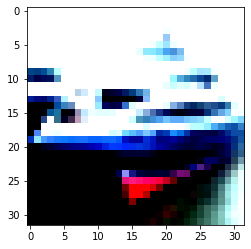

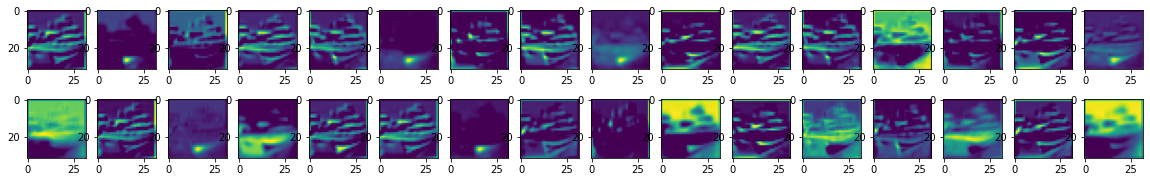

In [35]:
# 모델 전체에서 output을 가져올 수 있습니다.
import matplotlib.pyplot as plt
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output[1])
print(visual_model.summary())

test_img = np.expand_dims(x_test[1], axis = 0)
feature_maps = visual_model.predict(test_img)
plt.imshow(x_test[1])


plt.figure(figsize=(20,3))
cnt=1
for x in range(32):
    plt.subplot(2,16,cnt)
    plt.imshow(feature_maps[0][:,:,x])
    cnt+=1

C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


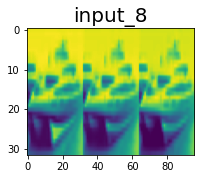

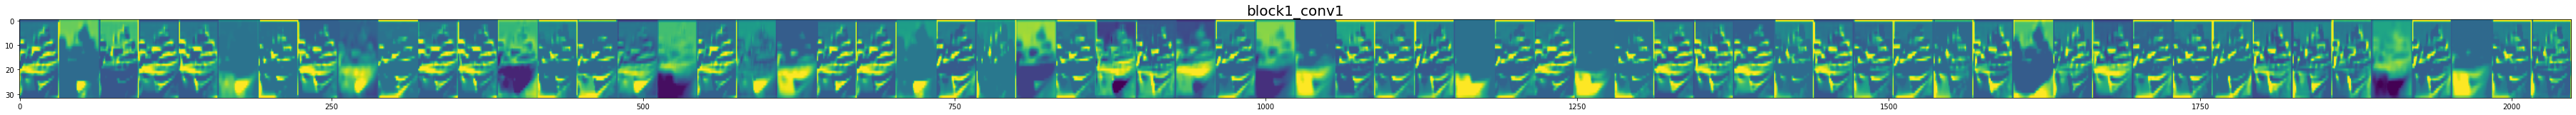

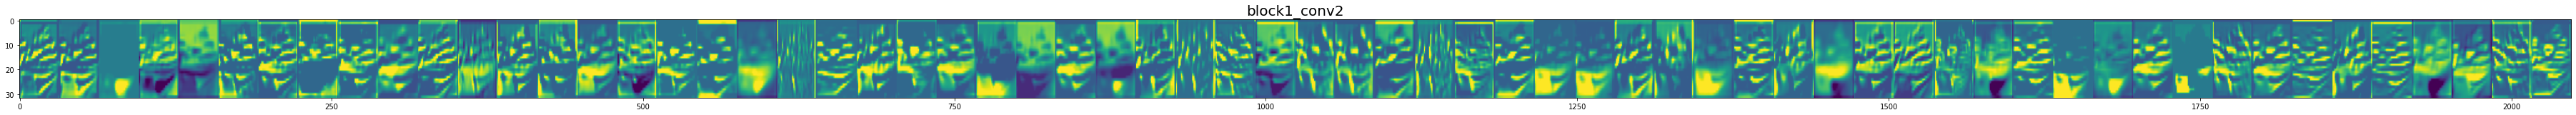

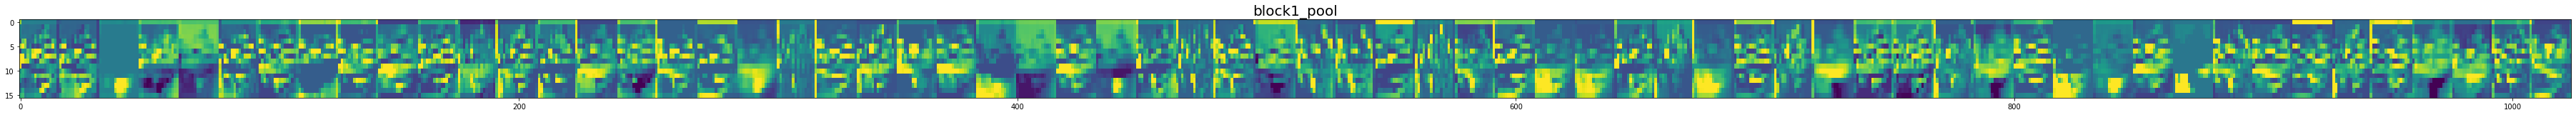

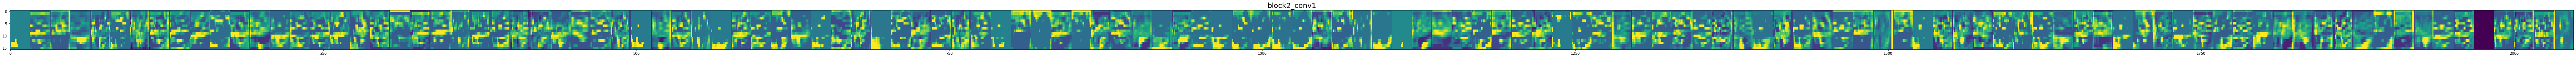

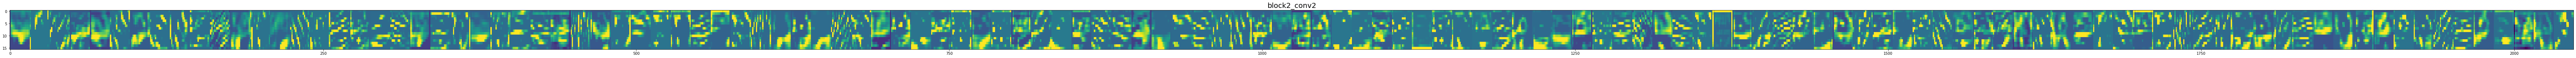

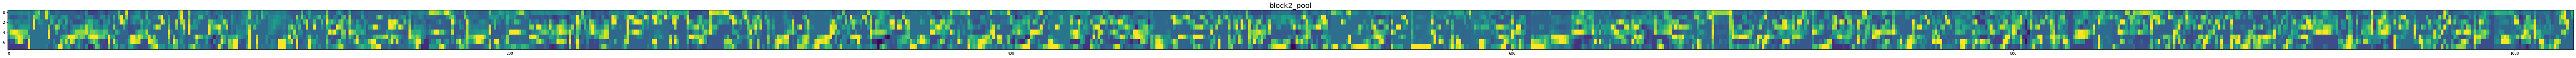

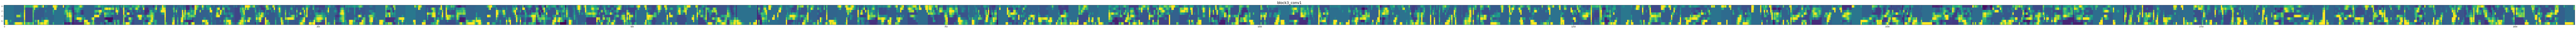

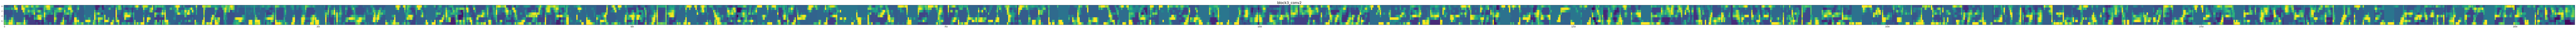

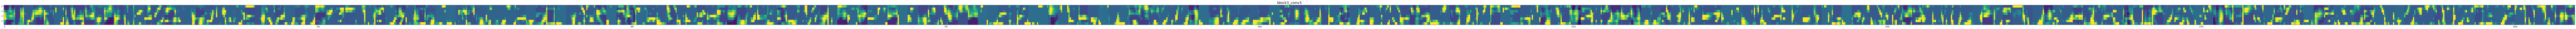

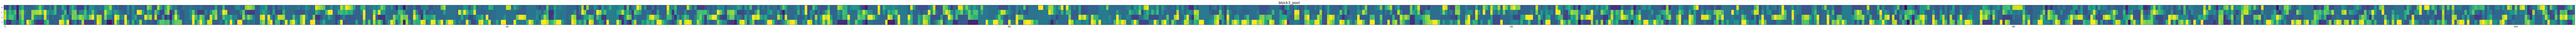

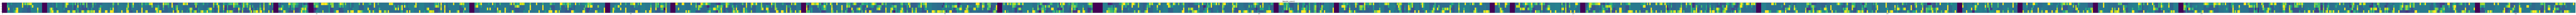

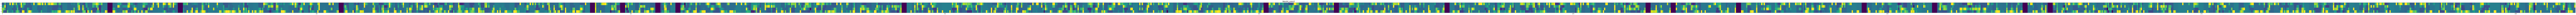

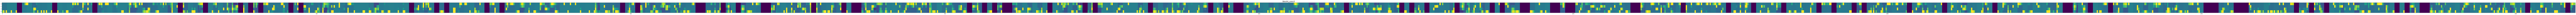

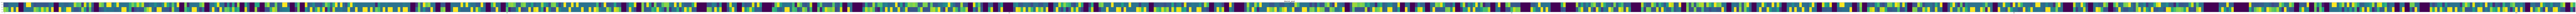

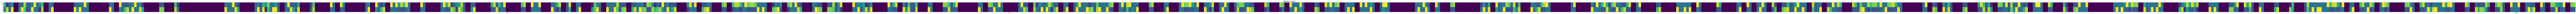

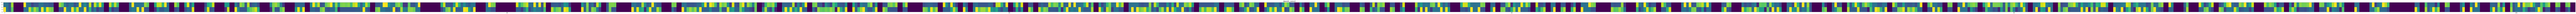

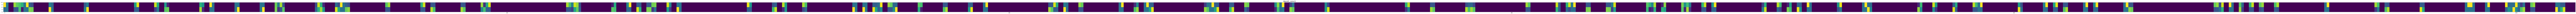

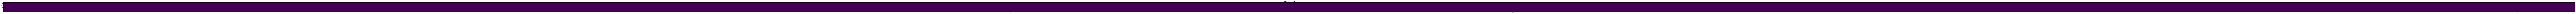

In [36]:
# 모델 전체에서 output을 가져올 수 있습니다.
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output)

# 테스트셋의 두 번째 데이터는 '배'입니다.
test_img = np.expand_dims(x_test[1], axis = 0)
feature_maps = visual_model.predict(test_img)

for layer_name, feature_map in zip(get_layer_name, feature_maps):
    # Dense 층은 제외합니다.
    if(len(feature_map.shape) == 4):
        img_size = feature_map.shape[1]
        features = feature_map.shape[-1]
        
        # (img_size, img_size)의 feature_map이 features 개수만큼 존재합니다.
        display_grid = np.zeros((img_size, img_size * features))
        
        # 각 특징맵을 display_grid 배열에 이어붙입니다.
        for i in range(features):
            x = feature_map[0, :, :, i]
            x -= x.mean(); x /= x.std()
            x *= 64; x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * img_size : (i + 1) * img_size] = x
            
        plt.figure(figsize = (features, 2 + 1./features))
        plt.title(layer_name, fontsize = 20)
        plt.grid(False)
        plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')